In [1]:
'''Se se procede a importar los modulos necesarios.'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
'''Se cargan los datos del dataset con ISO-8859-1 para definir la codificación del alfabeto.'''
df = pd.read_csv("spam.csv",encoding = "ISO-8859-1")

In [3]:
'''Se presenta las primeras filas del dataset ya que se devuelve las primeras filas.'''
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
'''Se verifica que que el valor de spam y no spam sean unicos.'''
pd.unique(df.v1)

array(['ham', 'spam'], dtype=object)

In [5]:
'''Se define si es spam o no spam con el uso del mapeo para cambiar a 1 si es spam y a 0 si no es spam.'''
d1 = {'spam': 1 , 'ham': 0}
df['v1'] = df['v1'].map(d1)

In [6]:
'''Se define el numero de etiquetas con el metodo asarray.'''
labels=np.asarray(df.v1)
'''Se define el numero de texto con el metodo astype.'''
texts=np.asarray(df.v2).astype('<U910')
'''Se presenta el numero de textos.'''
print("número de textos:" , len(texts))
'''Se presenta el numero de etiquetas.'''
print("número de etiquetas: ", len(labels))

número de textos: 5572
número de etiquetas:  5572


In [7]:
'''Se define las X de entrenamiento, x DE TESTEO, y de entramiento y y de testeo. Es importante destacar que train_test_split
divide los datos de aprendizaje automático en un conjunto de entrenamiento y un conjunto de prueba.'''
X_train, X_test, y_train, y_test = train_test_split( texts, labels, test_size=0.3, random_state=0)

In [8]:
 '''Se convierte texto en datos numéricos con la función CountVectorizer().'''
cv = CountVectorizer() 
 '''Se realiza el cálculo y luego hacer una transformación entrenamiento de X_train.'''
X_train = cv.fit_transform(X_train)
 '''Se realiza la transformación de X_train.'''
X_test = cv.transform(X_test)

In [9]:
 '''Se realiza la transformación de X_train.'''
clf = svm.SVC(kernel = 'linear', random_state = 10)
 '''Se realiza el entrenamiento de X_train, y_train.'''
clf.fit(X_train, y_train)
 '''Se realiza la predicción de X_test.'''
y_pred = clf.predict(X_test)

In [10]:
'''Se calcula Accuracy con el uso de accuracy_score en la y de testeo y Y de predicción.'''
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
'''Se calcula Precision con el uso de precision_score en la y de testeo y Y de predicción.'''
print("Precision:", metrics.precision_score(y_test, y_pred))
'''Se calcula Recall con el uso de recall_score en la y de testeo y Y de predicción.'''
print("Recall:", metrics.recall_score(y_test, y_pred))


Accuracy: 0.9814593301435407
Precision: 0.9813953488372092
Recall: 0.8865546218487395


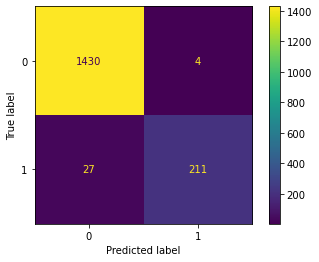

In [11]:
'''Se define la matriz de confusión de pred, y_test.'''
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
'''Con ConfusionMatrixDisplay se visualiza la matriz de confusión.'''
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
'''Se procede a dibujar marcadores en el diagrama.'''
disp.plot()
'''Muestra la matriz de confusión.'''
plt.show()